<a href="https://colab.research.google.com/github/gdnsjf/educational-work/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Возьмите вашу собственную фотографию с несколькими людьми в кадре. Примените разные подходы для обнаружения лиц на фото
- Гистограмма ориентированных градиентов (HOG)
Face landmarks,
Embeddings,
Любую известную архитектуру, например MTCNN

HOG

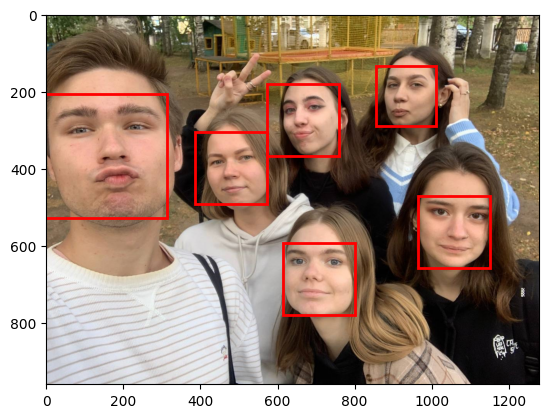

In [ ]:
import dlib
from skimage import io
import matplotlib.pyplot as plt

# Загрузка изображения
image_path = "/content/j4N6wqVAKE0.jpg"
image = io.imread(image_path)

# Детектор лиц с использованием HOG
detector = dlib.get_frontal_face_detector()
faces = detector(image, 1)

# Отображение результата
plt.imshow(image)
for face in faces:
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2))
plt.show()


Face landmarks

--2024-08-14 13:00:14--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  16.7MB/s    in 3.7s    

2024-08-14 13:00:18 (16.7 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



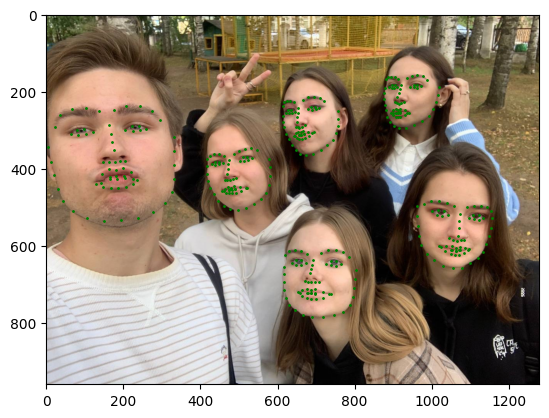

In [ ]:
import dlib
from skimage import io
import matplotlib.pyplot as plt

!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

# Загрузка модели предсказания ключевых точек
predictor_path = "shape_predictor_68_face_landmarks.dat"  # Make sure the path is correct
predictor = dlib.shape_predictor(predictor_path)

# Детектирование лиц (используем результат HOG)
faces = detector(image, 1)

# Отображение изображения и ключевых точек
plt.imshow(image)
for face in faces:
    shape = predictor(image, face)
    for i in range(68):
        plt.plot(shape.part(i).x, shape.part(i).y, marker='o', color='green', markersize=1)
plt.show()

Embeddings

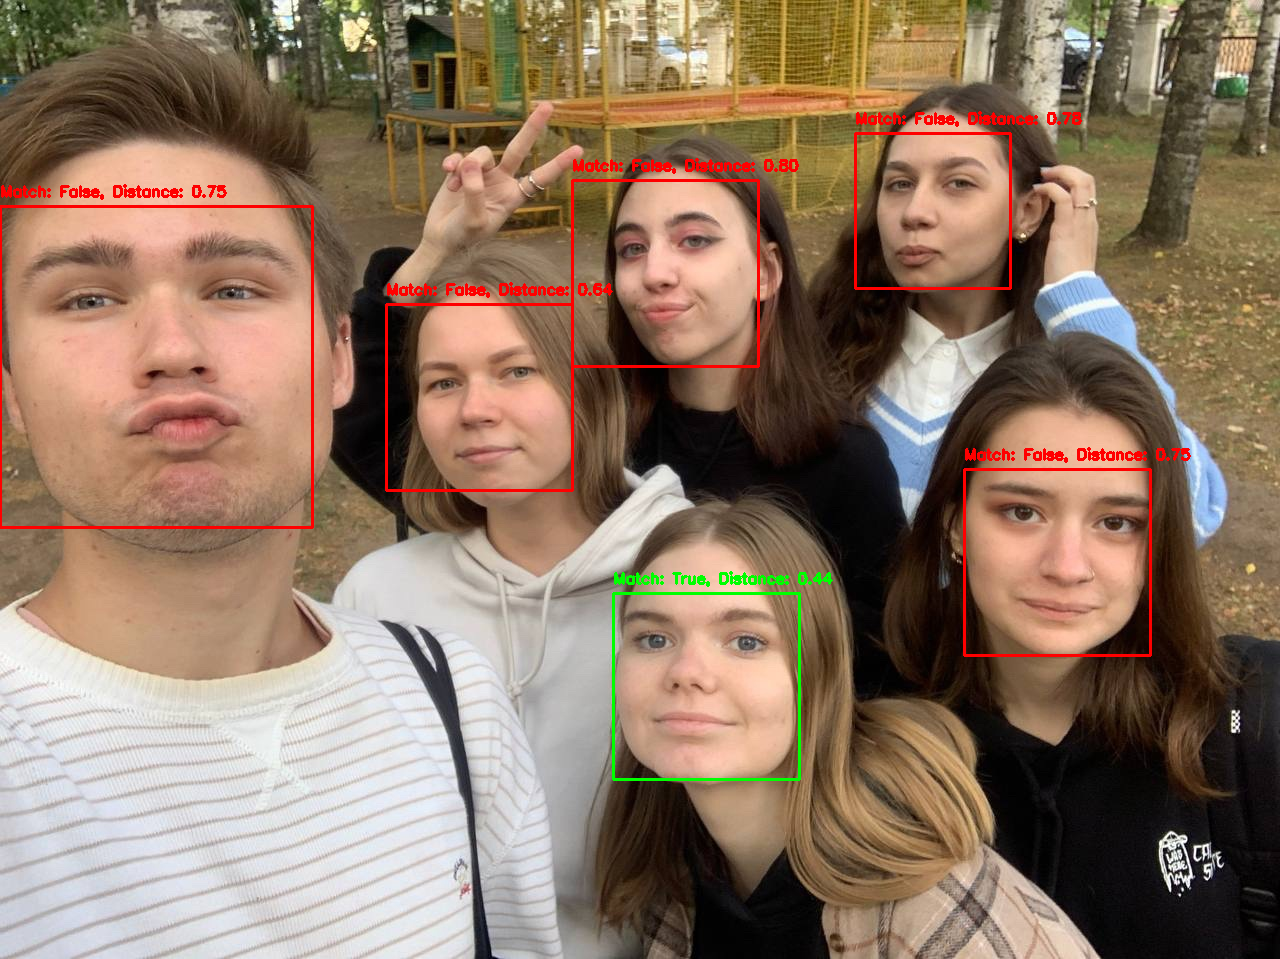

In [ ]:
!pip install face_recognition
import face_recognition
import cv2

# Загрузка изображения
image = cv2.imread("/content/j4N6wqVAKE0.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Обнаружение лиц и вычисление эмбеддингов
face_locations = face_recognition.face_locations(image_rgb)
face_encodings = face_recognition.face_encodings(image_rgb, face_locations)

# Загрузка эталонного лица
known_image = cv2.imread("/content/XdZH9JYWw3Y.jpg")
known_image_rgb = cv2.cvtColor(known_image, cv2.COLOR_BGR2RGB)
known_face_encoding = face_recognition.face_encodings(known_image_rgb)[0]

# Сравнение лиц с эталоном
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces([known_face_encoding], face_encoding)
    face_distance = face_recognition.face_distance([known_face_encoding], face_encoding)[0]

    # Рисование прямоугольника и текста
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.putText(image, f"Match: {matches[0]}, Distance: {face_distance:.2f}", (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Показ результата
cv2.imshow("Face Embeddings", image)
cv2.waitKey(0)
cv2.destroyAllWindows()



MTCNN

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.3 MB/s eta 0:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


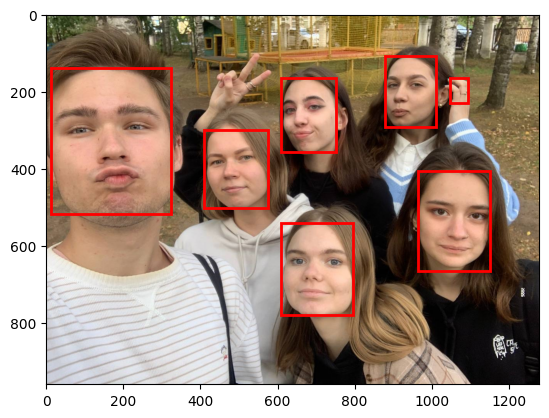

In [ ]:
!pip install mtcnn # Install the mtcnn module
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread("/content/j4N6wqVAKE0.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Обнаружение лиц с помощью MTCNN
detector = MTCNN()
faces = detector.detect_faces(image_rgb)

# Отображение результата
plt.imshow(image_rgb)
for face in faces:
    x, y, w, h = face['box']
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2))
plt.show()